In [1]:
!pip install tensorflow

In [2]:
!pip install keras 

In [60]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical

In [61]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

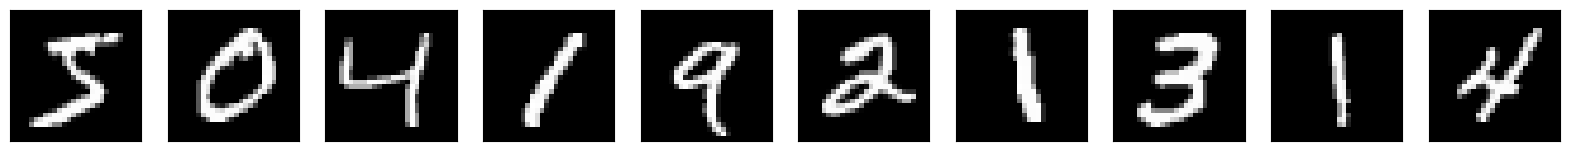

In [62]:
import matplotlib.pyplot as plt 

n = 10
plt.figure(figsize=(20,4))

for i in range(n):

    ax = plt.subplot(2, n, i+1)

    plt.imshow(X_train[i].reshape(28,28))

    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

In [63]:
print(f"Previous Size of X_train: {X_train.shape}\nPrevious Size of Y_train: {Y_train.shape}")

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

Previous Size of X_train: (60000, 28, 28)
Previous Size of Y_train: (60000,)


In [64]:

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

In [65]:
classes = 10

Y_train = to_categorical(Y_train,classes)
Y_test = to_categorical(Y_test,classes)

print(f"New Shape of X_train: {X_train.shape}\nNew Shape of Y_train: {Y_train.shape}")

New Shape of X_train: (60000, 784)
New Shape of Y_train: (60000, 10)


In [66]:
input_size = 784

batch_size = 200

hidden1 = 400

hidden2 = 20

epochs = 10

classes = 10

In [67]:
model = Sequential()

model.add(Dense(hidden1, input_dim=input_size, activation="relu"))

model.add(Dense(hidden2, activation="relu"))

model.add(Dense(classes, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],optimizer="sgd")
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 20)                  │           8,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,230 (1.23 MB)

 Trainable params: 322,230 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
from time import time 

tic = time()

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

toc = time()

print(f"Total Time Taken: {toc-tic} secs")


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3684 - loss: 1.9882
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7800 - loss: 0.9359
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8596 - loss: 0.5606
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8824 - loss: 0.4408
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8970 - loss: 0.3800
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9028 - loss: 0.3501
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9054 - loss: 0.3282
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9104 - loss: 0.3128
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9151 - loss: 0.2969
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9177 - loss: 0.2855
Total Time Taken: 33.16178607940674 secs


In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

y_prob = model.predict(X_test,verbose=0)
y_pred = np.where(y_prob > 0.5, 1, 0)

accuracy = accuracy_score(y_pred,Y_test)
print(f"Testing Accuracy: {accuracy} %")

Testing Accuracy: 0.9036 %


In [71]:
mask = range(20, 50)

X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

valid_prob = model.predict(X_valid)
valid_pred = np.where(valid_prob > 0.5, 1, 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


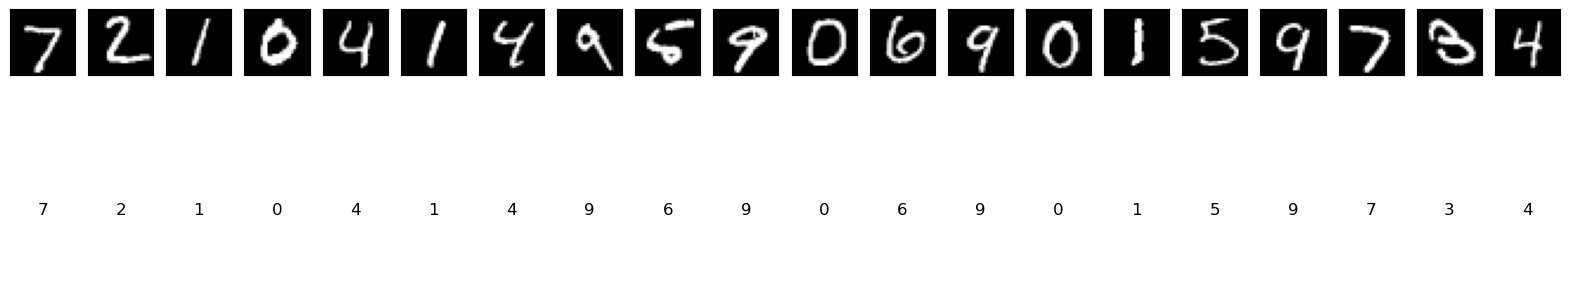

In [73]:
n = len(X_valid)
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_valid[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    pred_digit = np.argmax(valid_prob[i])
    ax = plt.subplot(2, n, i+1+n)
    plt.text(0.5, 0.5, str(pred_digit), fontsize=12, ha="center", va="center")
    plt.axis("off")

plt.show()
plt.close()